# <center>💔 Heart Failure Prediction using Artificial Neural Networks (ANNs)💔</center>

<p>Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.</br>
</br>Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.</br>

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.</br>

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.</br></p>

In [12]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [13]:
## Importing the data
data = pd.read_csv(r'heart_failure_clinical_records_dataset.csv')

In [14]:
## Discovering what columns, entries and datatypes the data consists of
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## <center> About the data (Description of attributes)</center></br>
<ul>
<li><b>age</b>: Age of the patient </br>
</br>
<li><b>anaemia</b>: If the patient is anemic or not  (Boolean) </br>
</br>
<li><b>creatinine_phosphokinase</b>: Level of the CPK enzyme in the blood (mcg/L) </br>
</br>
<li><b>diabetes</b>: If the patient is diabetic (Boolean) </br>
</br>
<li><b>ejection_fraction</b>: Percentage of blood leaving the heart at each contraction </br>
</br>
<li><b>high_blood_pressure</b>: If the patient has hypertension (Boolean) </br>
</br>
<li><b>platelets</b>: Platelet count in blood (kiloplatelets/mL) </br>
</br>
<li><b>serum_creatinine</b>: Level of serum creatinine in the blood (mg/dL) </br>
</br>
<li><b>serum_sodium</b>: Level of serum sodium in the blood (mEq/L) </br>
</br>
<li><b>sex</b>: Assigned sex of the patient </br>
</br>
<li><b>smoking</b>: If the patient is a smoker or not (Boolean) </br>
</br>
<li><b>time</b>: The follow-up examination period (in days) </br>
</br>
<li><b>DEATH_EVENT:</b> If the patient deceased during the follow-up examination period (Boolean) </br> 
</br>
</ul>
    [Attributes having Boolean values: 0 = Negative (No); 1 = Positive (Yes)]</br>

## <center> Exploratory Analysis of the Data</center>

In [15]:
## Getting a taste of what the data consists of by printing 10 styled 
data.sample(10).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
158,85.000000,1,910,0,50,0,235000.000000,1.300000,134,1,0,121,0
22,68.000000,1,220,0,35,1,289000.000000,0.900000,140,1,1,20,1
144,72.000000,1,943,0,25,1,338000.000000,1.700000,139,1,1,111,1
211,50.000000,0,582,0,62,1,147000.000000,0.800000,140,1,1,192,0
293,63.000000,1,103,1,35,0,179000.000000,0.900000,136,1,1,270,0
87,65.000000,1,68,1,60,1,304000.000000,0.800000,140,1,0,79,0
174,65.000000,0,198,1,35,1,281000.000000,0.900000,137,1,1,146,0
227,55.000000,1,2794,0,35,1,141000.000000,1.000000,140,1,0,206,0
203,60.000000,0,59,0,25,1,212000.000000,3.500000,136,1,1,187,0
148,75.000000,1,582,0,30,0,225000.000000,1.830000,134,1,0,113,1


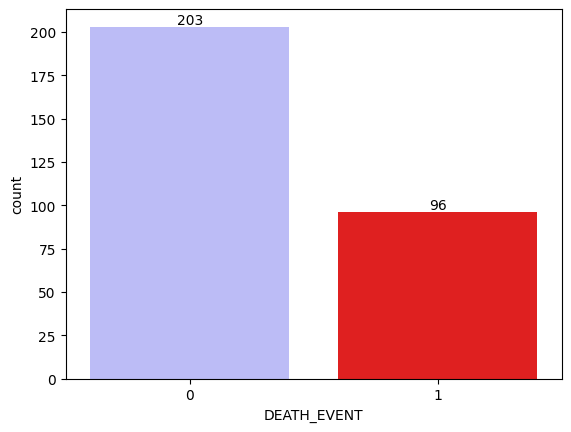

In [16]:
## Evaluating the target  and finding out the potential skewness in the data

colours= ["#b3b3ff","#ff0000"]
ax = sns.countplot(x= data["DEATH_EVENT"], palette= colours)
ax.bar_label(ax.containers[0])
plt.show()


In [17]:
## Doing Univariate Analysis for statistical description and understanding of dispersion of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [18]:
## Identifying the correlat~ion between features of the data
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


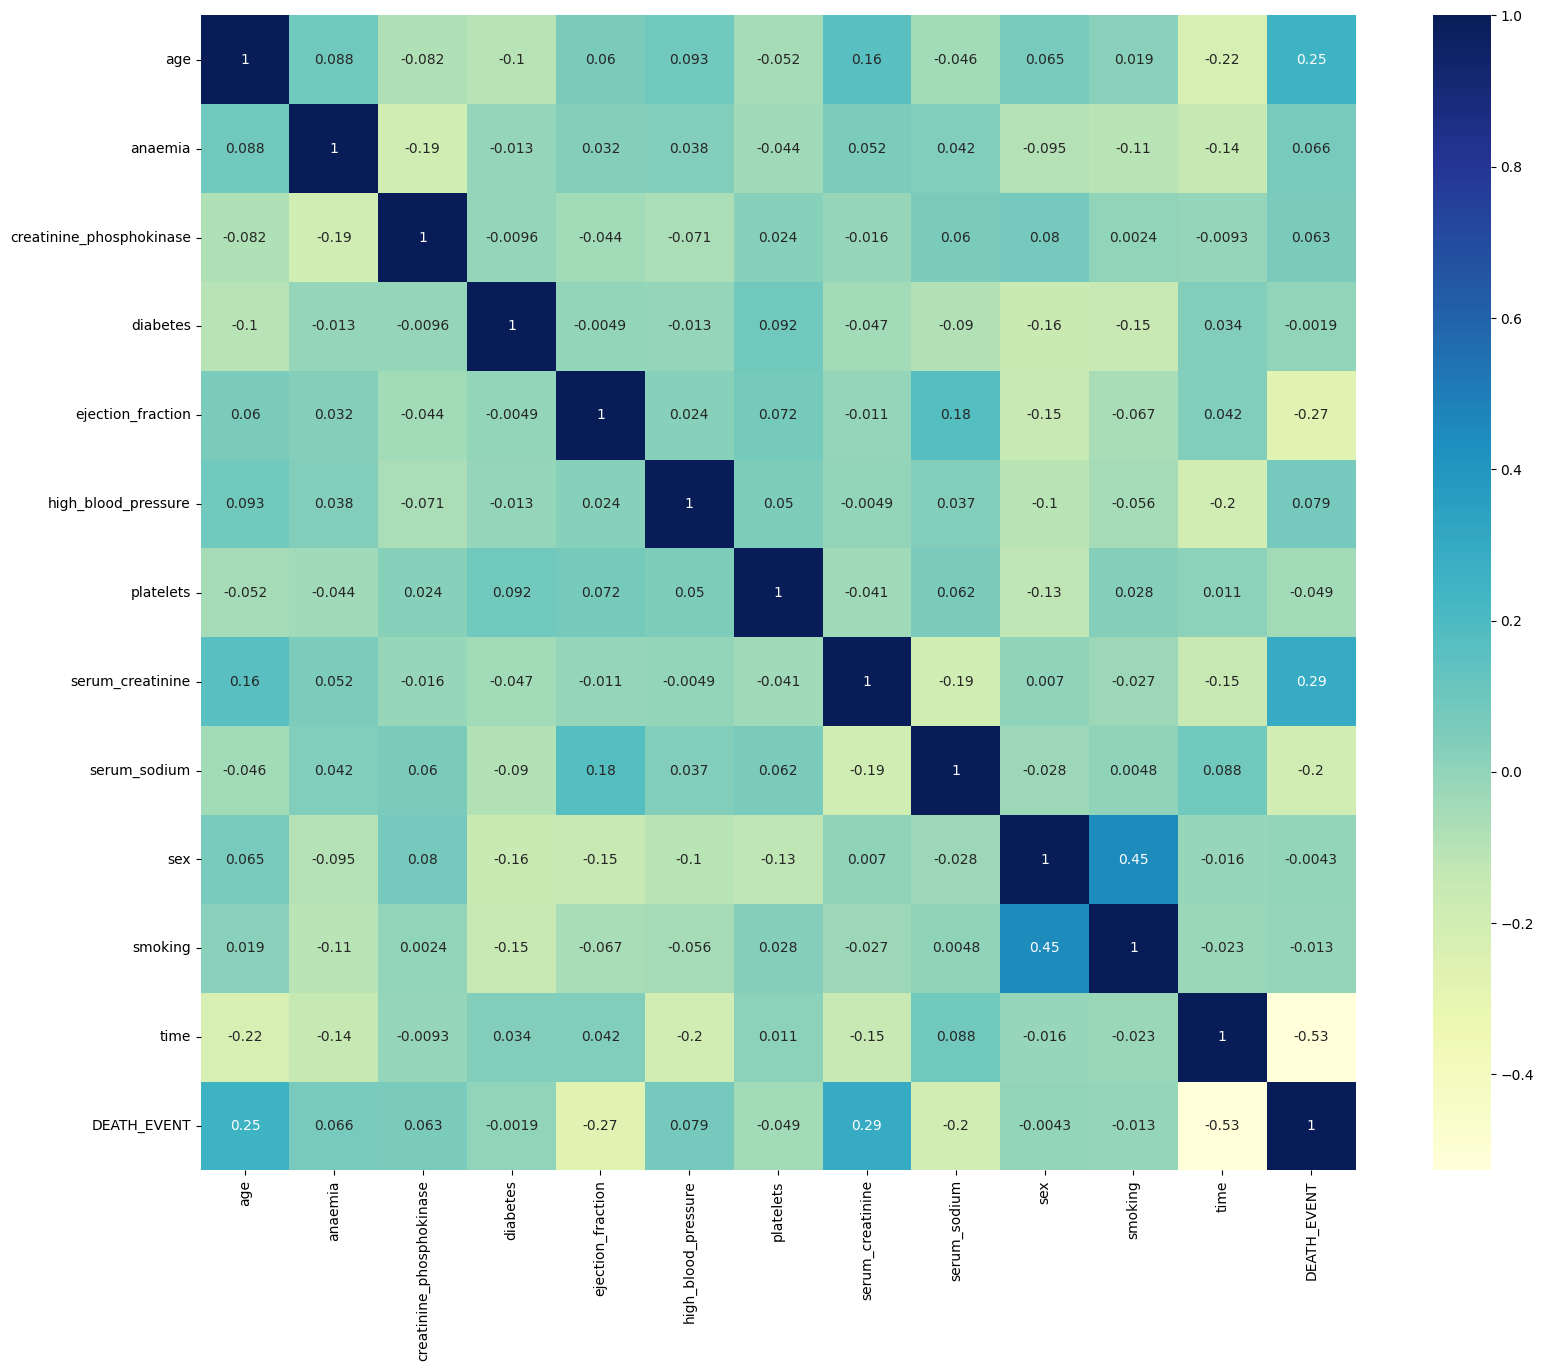

In [19]:
## Visualizing the correlation of features listed above as a correlation matrix on a heatmap.
corr_matrix = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix,cmap='YlGnBu', linecolor="black" ,annot=True, square=True)
plt.show()

<b>Most correlated features as follows</b>:
<ul>
<li>time: -0.53
<li>smoking: 0.45
<li>serum_creatinine: 0.29
<li>ejection_fraction: -0.27
<li>age: 0.25
<li>serum_sodium: -0.2
</ul>

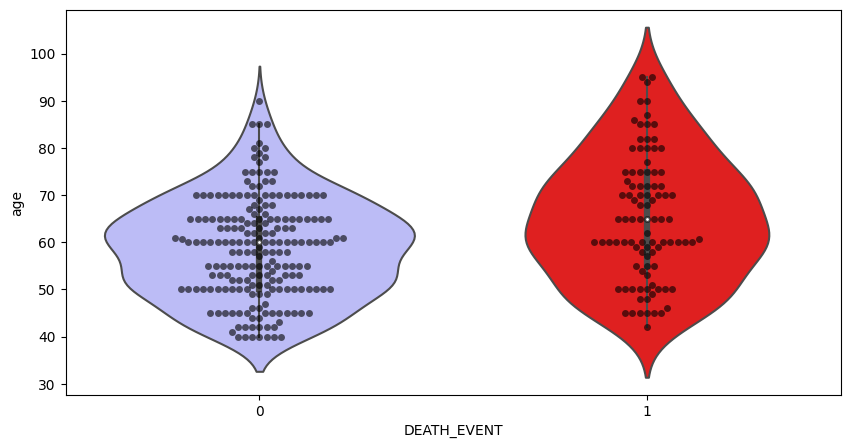

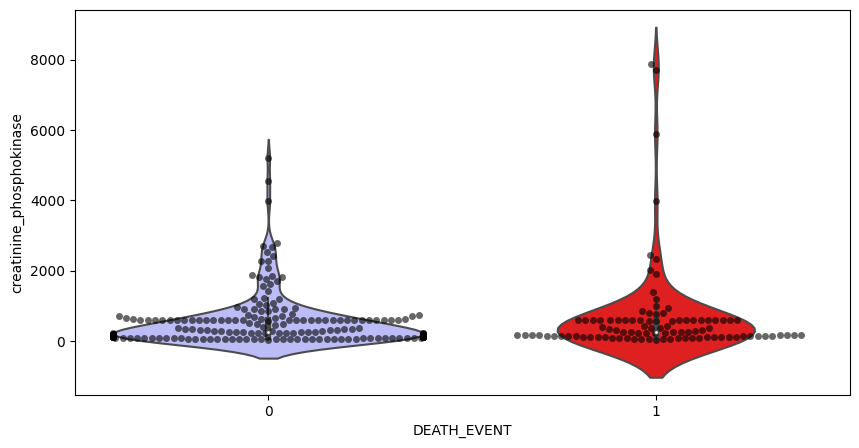

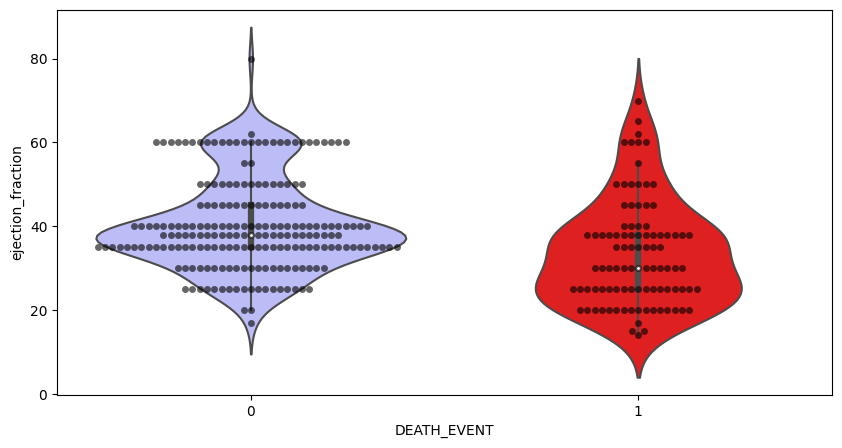

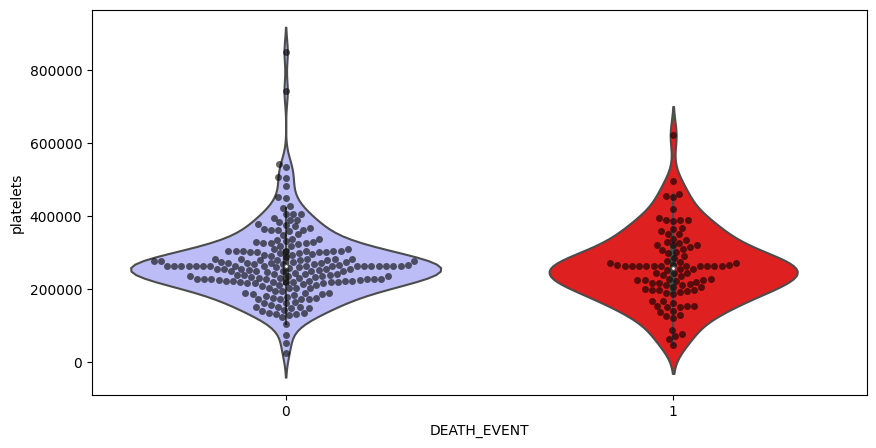

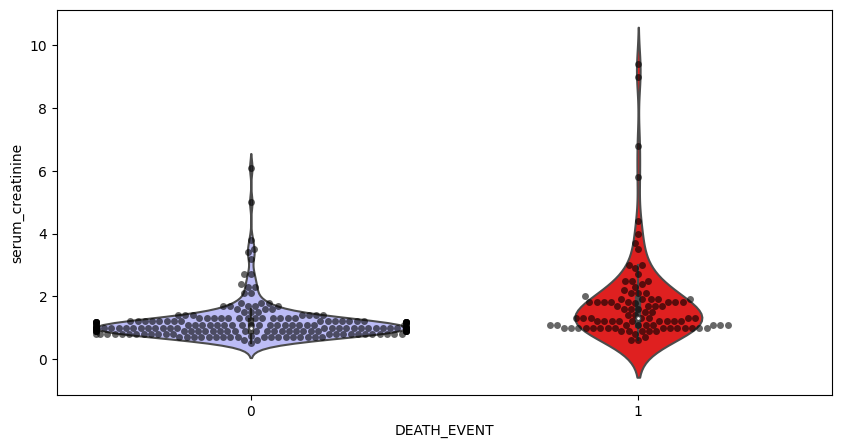

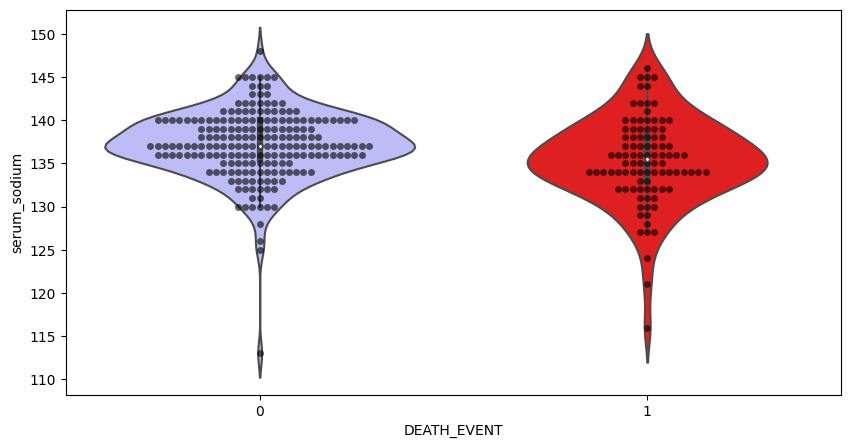

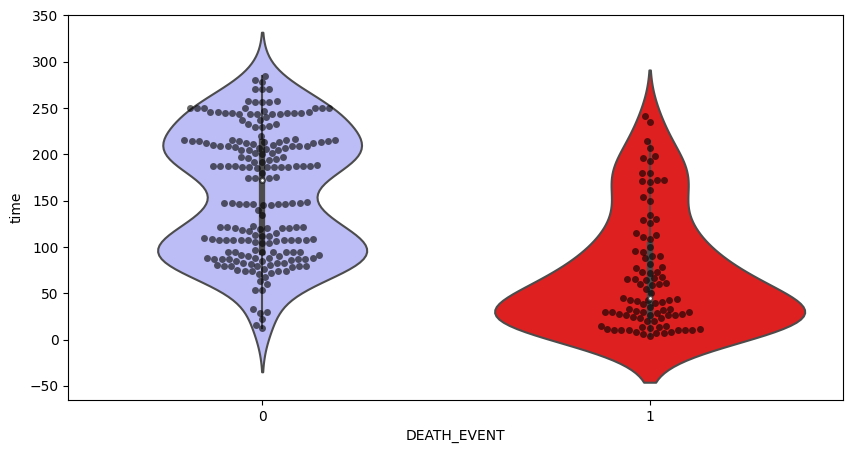

In [20]:
## Checking for any potential outliers of non-binary features by iterating a figure for every feature
features = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in features: 
    plt.figure(figsize=(10,5))
    sns.swarmplot(x=data["DEATH_EVENT"], y=data[i], color="black", alpha=0.6)
    sns.violinplot(x=data["DEATH_EVENT"], y=data[i], palette=colours)
    plt.show() 

<b>Observations</b>:
<ul>
<li>There exist some outliers in almost all of the features
<li>It is obvious that age is a factor that plays a role in a death event
<li>It is also obvious how serum creatinine value is higher in death events
<li>The more the follow-up days the greater the probability of a fatality

</ul>

In [21]:

## Calculating the z-scores for each data point
z_scores = np.abs((data - data.mean()) / data.std())
## Defining a threshold to identify outliers
threshold = 3
#
outliers = z_scores > threshold  

In [22]:
## Calculating 
percentage_outliers = round((outliers.sum().sum() / data.size) * 100,4)


In [23]:

print("Percentage of outliers:", percentage_outliers, "%")


Percentage of outliers: 0.5145 %


<b>Observations</b>:
<ul>
<li>The percentage of outliers is approximately 0.51% of the data.
<li>Taking into consideration size of the data in comparison to the small percentage of outliers, it was decided to keep the outliers intact.
</ul>

# 🧠Artificial Neural Network (ANN) Implementation

### The steps used for the creation of this project's section are as follows:
<ol>
<li> Data Preprocessing
<li> Artificial Neural Network (ANN) Creation
<li> ANN Training
<li> ANN Deployment
<li> ANN Evaluation
</ol>


###  <center>1.Data Preproccessing</center>

In [24]:
## Splitting the data into x and y by extracting the dataframe values
x = data.iloc[:,0:-1].values
y = data.iloc[:, -1].values

In [25]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

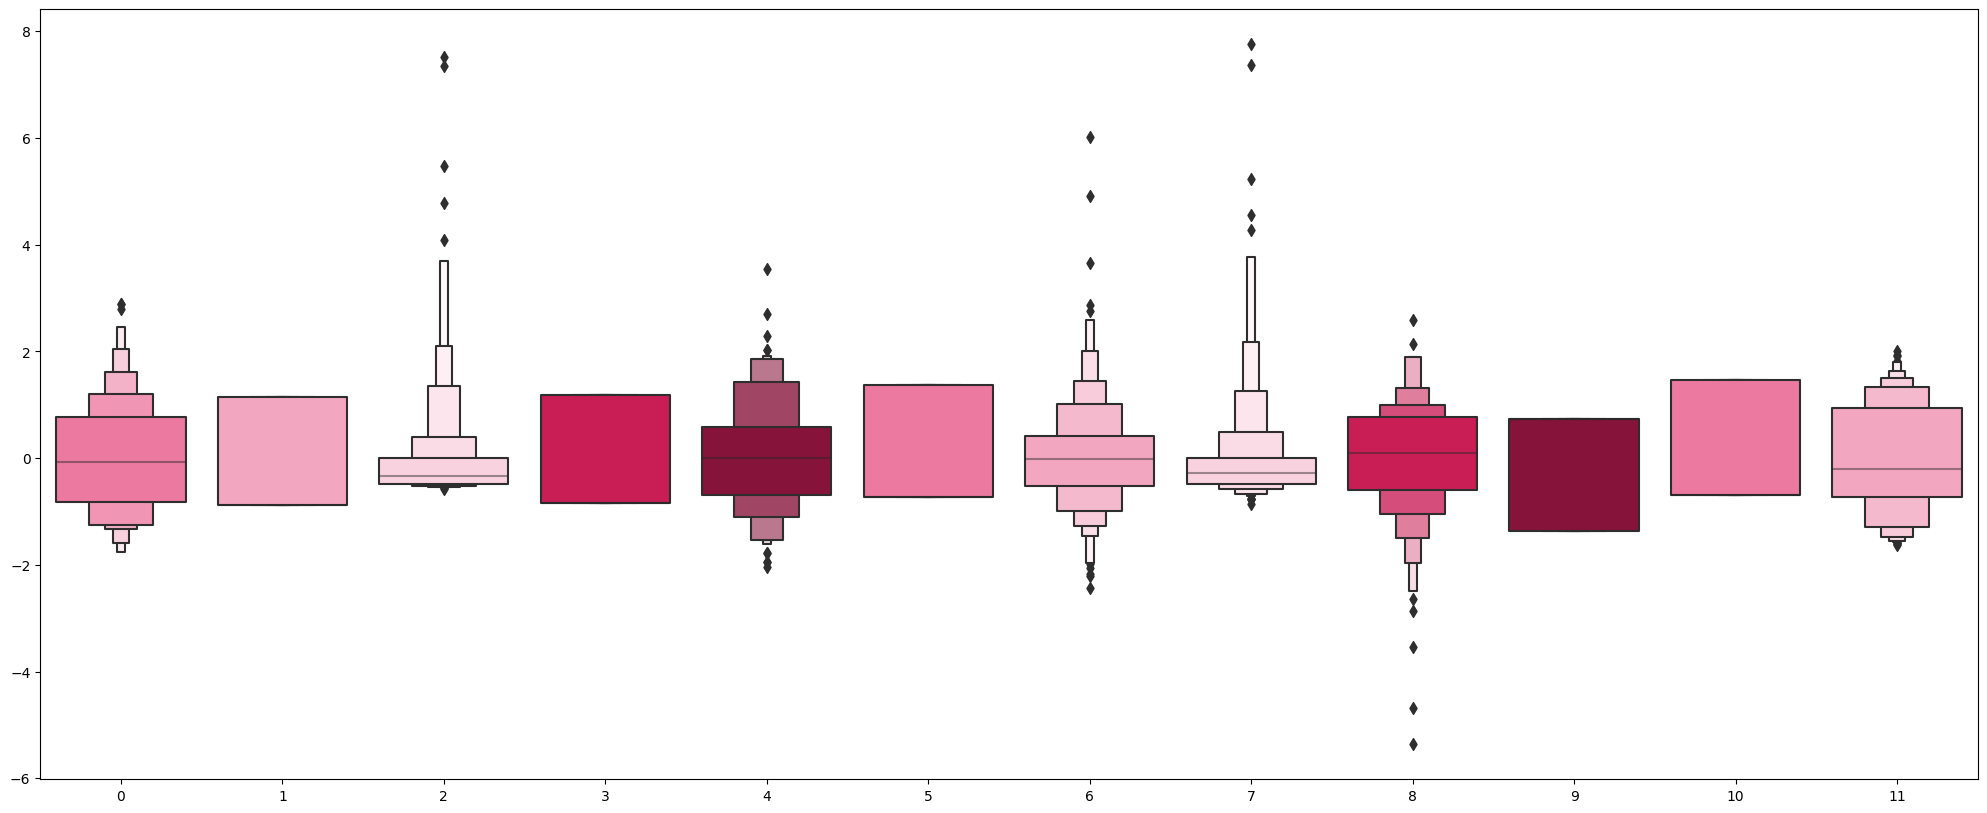

In [26]:
## Visualizing the scaled data features
colours1 = ['#ff6699', '#ff99bb','#ffccdd','#e6004c','#990033']
plt.figure(figsize=(25,10))
sns.boxenplot(data=x, palette=colours1)
plt.show()

In [27]:
## Further splitting the data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=32)

In [28]:
x.shape

(299, 12)

### <center>2. Artificial Neural Network (ANN) Creation </center>

In [29]:
## Deploying an Early Stopping technique to stop the ANN from training further once its maxed

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, ## minimium amount of change to count as an improvement
    patience=20, ## how many epochs to wait before stopping
    restore_best_weights=True)

## Initialising the NN
kmodel = Sequential()

In [30]:

## Building the model layers


## Initial Layer 
kmodel.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
## Hidden Layer No.1
kmodel.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
## First regularization application
kmodel.add(Dropout(0.25))
## Hidden Layer No.2
kmodel.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
## Second regularization application
kmodel.add(Dropout(0.5))
## Output Layer
kmodel.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [31]:
## Compiling the layers of the model together by using the Adam Optimizer and binary cross entropy loss computation
kmodel.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

### <center>3. ANN Training</center>

In [32]:
## Printing a summary of the ANN
print(kmodel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 425
Trainable params: 425
Non-trainable pa

In [33]:
## Training the model with a batch size of 20 and 100 iterations (epochs)
history = kmodel.fit(x_train, y_train, batch_size = 20, epochs = 100, callbacks=[early_stopping], validation_split=0.20)

Epoch 1/100
10/10 [==============================] - 2s 44ms/step - loss: 0.6925 - accuracy: 0.6021 - val_loss: 0.6908 - val_accuracy: 0.7500
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6909 - accuracy: 0.6597 - val_loss: 0.6883 - val_accuracy: 0.7500
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6895 - accuracy: 0.6597 - val_loss: 0.6858 - val_accuracy: 0.7500
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6879 - accuracy: 0.6597 - val_loss: 0.6833 - val_accuracy: 0.7500
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6860 - accuracy: 0.6597 - val_loss: 0.6804 - val_accuracy: 0.7500
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.6597 - val_loss: 0.6770 - val_accuracy: 0.7500
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6814 - accuracy: 0.6597 - val_loss: 0.6723 - val_accuracy: 0.7500
Epoch 8/100


In [34]:
## Train and Test accuracy model evaluation 
scores = kmodel.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = kmodel.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

8/8 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8828
Training Accuracy: 88.28%

2/2 [==============================] - 0s 7ms/step - loss: 0.4332 - accuracy: 0.8500
Testing Accuracy: 85.00%



### <center>4. ANN Deployment</center>

In [36]:
## Applying the ANN to make a prediction
y_pred = kmodel.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

2/2 [==============================] - 0s 4ms/step
[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


### <center>5. ANN Evaluation </center>

In [37]:
## Deploying a confusion matrix based on the y_test
cm = confusion_matrix(y_test, y_pred)
print(cm)
round(accuracy_score(y_test, y_pred)*100, 2)
     

[[37  4]
 [ 5 14]]


85.0

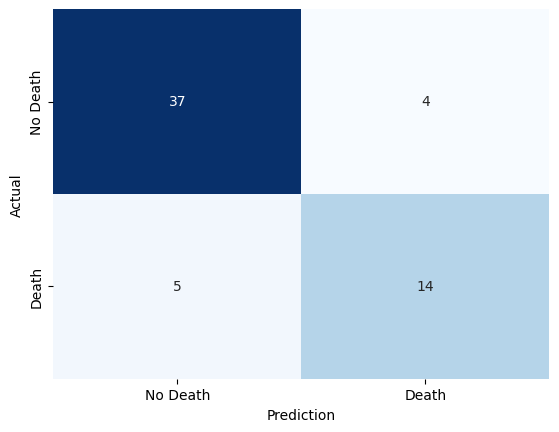

In [38]:
## Visualizing the confusion matrix using a heatmap
ax = sns.heatmap(cm, annot=True, xticklabels=["No Death",'Death'], yticklabels=['No Death','Death'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

<b>Observations</b>:
<ul>
<li>There were 37 deaths pre against 5 false negatives (No Deaths)
<li>There were 4 False positives versus 14 True positives (Deaths)
</ul>

In [39]:
## Storing the accuracy and loss results in variables for visualization
acc = history.history['accuracy']
loss = history.history['loss']

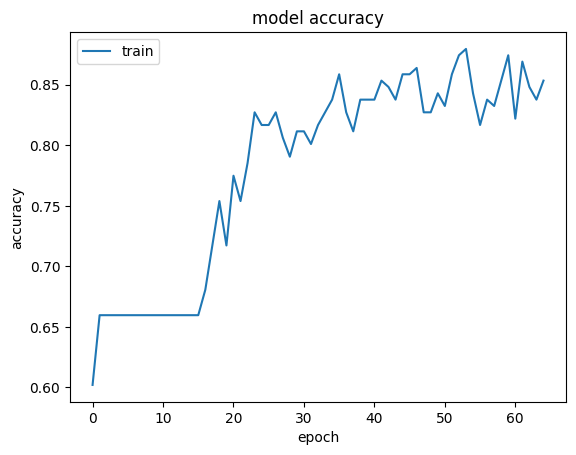

In [40]:
## Plotting the model's accuracy 
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

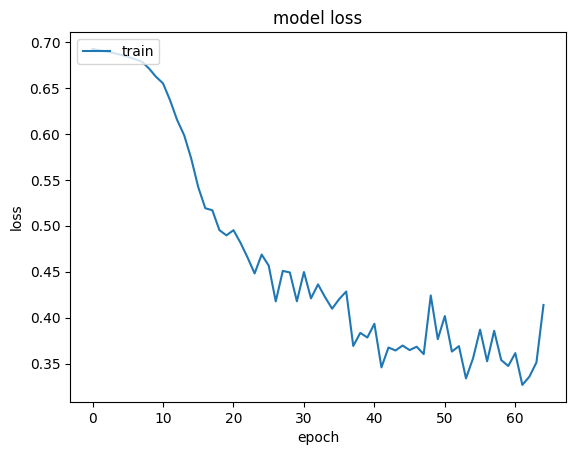

In [41]:
##Plotting the model's loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# <center>Thank you!💖</center>